In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from CatsDogsCNN import AlexNet, AlexNetNMP

In [3]:
modelNMP = AlexNetNMP()
model = AlexNet()
model.load_state_dict(torch.load("./models/AlexNet"))
modelNMP.load_state_dict(torch.load("./models/AlexNetNMP"))
model.eval()
modelNMP.eval()
print("Models loaded")

Models loaded


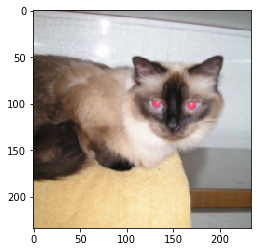

In [12]:
from PIL import Image
nr_crops = 10
animal = "cat"
id = "20"

resize_transform = transforms.Compose([transforms.Resize(224 + nr_crops),
    transforms.CenterCrop(224 + nr_crops)])

test_image = Image.open("./cats_dogs/{}s/{}.{}.jpg".format(animal, animal, id)) # cat.100 is quite remarkable
crops = [transforms.functional.crop(resize_transform(test_image), offset, offset, 224, 224) for offset in range(nr_crops)]

plt.imshow(resize_transform(crops[9]))
plt.show()

In [13]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean = [ 0.485, 0.456, 0.406 ],
                                     std = [ 0.229, 0.224, 0.225 ]),
            ])
data = torch.stack([transform(crop) for crop in crops])
data.shape

torch.Size([10, 3, 224, 224])

In [14]:
model(data)

tensor([[ 1.1273, -1.0587],
        [ 1.4230, -1.3368],
        [ 1.2103, -1.1239],
        [ 1.8887, -1.8095],
        [ 2.0960, -2.0321],
        [ 1.7578, -1.7113],
        [ 0.9273, -0.9041],
        [ 1.0000, -0.9839],
        [ 1.0472, -1.0215],
        [ 0.6437, -0.6044]], grad_fn=<AddmmBackward>)

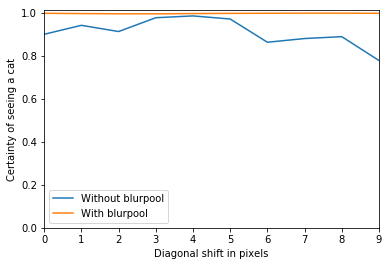

In [15]:
with torch.no_grad():
    certainty_MP = np.array(F.softmax(model(data), dim=1))[:,int(animal=="dog")]
    certainty_NMP = np.array(F.softmax(modelNMP(data), dim=1))[:,int(animal=="dog")]
    
plt.plot(certainty_MP, label="Without blurpool")
plt.plot(certainty_NMP, label="With blurpool")
plt.xlabel("Diagonal shift in pixels")
plt.ylabel("Certainty of seeing a {}".format(animal))
plt.ylim([0.0,1.01])
plt.xlim([0,nr_crops-1])
plt.xticks(np.arange(nr_crops))
plt.legend()
plt.show()

In [108]:
certainty_MP

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)